<a href="https://colab.research.google.com/github/giu-garrido/graph-caminhao/blob/main/Caminh%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anotações:
- ipywidgets
--------------------------------




*   Giulia Monteiro Garrido (RA: 24010281)
*   
*
-----------------------------------




**Avaliação:**

* Carregar arquivo corretamente (1pt)
* Gerar grafo inicial e plotar (1pt)
* Evidenciar pontes de interesse (que serão usadas pelos caminhoneiros) (2pts)
* Responder o problema (2pts)
* Justificativas (4pts)





In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from functools import partial

In [55]:
import urllib.request
url = 'https://raw.githubusercontent.com/giu-garrido/graph-caminhao/refs/heads/main/teste.txt'
response = urllib.request.urlopen(url)
content = response.read().decode('utf-8')
print(content)

4 5 4
1 2 9
1 3 0
2 3 8
2 4 7
3 4 4
1 4
2 1
3 1
4 3
4 5 2
1 2 30
2 3 20
3 4 10
4 1 40
2 4 50
1 3
1 2



In [56]:
data = content.split()
print(data)

['4', '5', '4', '1', '2', '9', '1', '3', '0', '2', '3', '8', '2', '4', '7', '3', '4', '4', '1', '4', '2', '1', '3', '1', '4', '3', '4', '5', '2', '1', '2', '30', '2', '3', '20', '3', '4', '10', '4', '1', '40', '2', '4', '50', '1', '3', '1', '2']


In [57]:
def leitura(data, index):

  while index < len(data):
    N, M, S = int(data[index]), int(data[index+1]), int(data[index+2]) # Salva em N = número de nodes, M = número de arestas e S = número de sedes
    index += 3 # Atualiza o index para depois dessas informações

    bridges = []
    for _ in range(M): # Percorre o número de pontes
      A, B, P = int(data[index]), int(data[index+1]), int(data[index+2]) # Salva em A = início, B = destino e P = weight (peso) da aresta
      index += 3 # Vai pra próxima aresta
      bridges.append((A, B, P))

    hq = []
    for _ in range(S): # Percorre o número de sedes
      A, B = int(data[index]), int(data[index+1]) # Salva em A = início, B = destino do caso teste
      index += 2 # Vai pra próxima sede
      hq.append((A, B))

    return N, M, S, bridges, hq, index

In [58]:
def criarGrafo(N, bridges):
  G = nx.Graph() # Cria o grafo

  for i in range(0, (N)): # Adiciona os nodes
    G.add_node(i+1)

  G.add_weighted_edges_from(bridges) # Adiciona as arestas com peso da lista pontes

  pos = nx.spring_layout(G, seed = 1) # Salva as posições do grafo no fromato spring, com uma seed para replicação

  labels = {(A, B): P for A, B, P in bridges} # Põe no formato com peso

  return G, labels, pos


In [59]:
def encontrarAGM(bridges):
  bridges.sort(key=lambda x: x[2], reverse=True) # Organiza a lista para maior peso -> menor peso

  T = nx.maximum_spanning_tree(G, weight='weight', algorithm='prim', ignore_nan=False) # Pega a árvore geradora máxima de G e salva em T
  aux = list(T.edges(data=True))
  l_p = dict()
  for a,b,p in aux: # Transforma para o formato necessário, networkx pf coopera
    w=p['weight']
    k=(a,b)
    l_p[k]=w

  #nx.draw(G, pos, with_labels=True, node_color="#f9b9ff", edge_color="gray", node_size=1000, font_size=15)
  #nx.draw(T, pos, with_labels=True, node_color="#f9b9ff", edge_color="#75067F", node_size=1000, font_size=15)
  #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color= "gray", font_size=10)
  #nx.draw_networkx_edge_labels(G, pos, edge_labels=l_p, font_color= "#75067F", font_size=10);

  #plt.show()

  return l_p, T

In [79]:
def caminho(T, hq):

  for a,b in hq:
    path = nx.shortest_path(T, a, b)

    aux = np.inf
    for i in range(len(path)-1):
      weights = T.get_edge_data(path[i], path[i+1])
      if weights.get('weight') < aux:
        aux = weights.get('weight')

    print(f'O maior peso que ele consegue carregar entre',{a}, 'e' ,{b}, 'é:',{aux})
  return path, aux

In [80]:
def printarGrafo(G, T, l_p):

  nx.draw(G, pos, with_labels=True, node_color="#f9b9ff", edge_color="gray", node_size=1000, font_size=15)
  nx.draw(T, pos, with_labels=True, node_color="#f9b9ff", edge_color="#75067F", node_size=1000, font_size=15)
  nx.draw(T, pos, with_labels=True, node_color="#f9b9ff", edge_color="#75067F", node_size=1000, font_size=15)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color= "gray", font_size=10)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=l_p, font_color= "#75067F", font_size=10);

  plt.show()

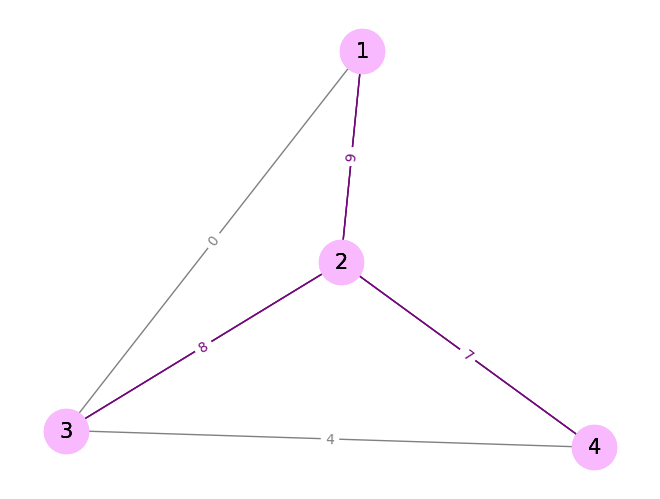

O maior peso que ele consegue carregar entre {1} e {4} é: {7}
O maior peso que ele consegue carregar entre {2} e {1} é: {9}
O maior peso que ele consegue carregar entre {3} e {1} é: {8}
O maior peso que ele consegue carregar entre {4} e {3} é: {7}


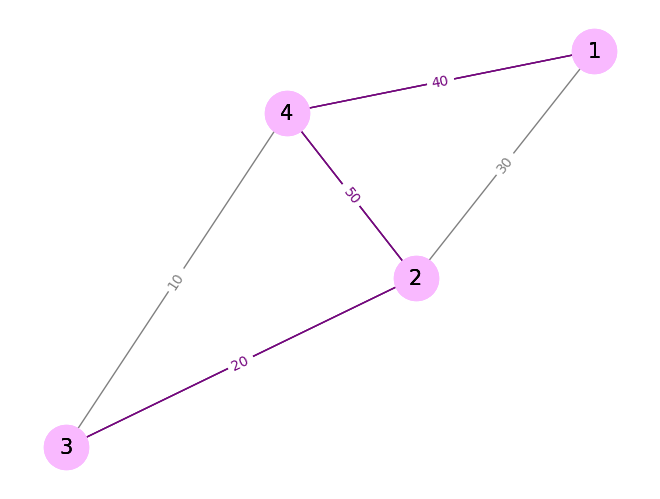

O maior peso que ele consegue carregar entre {1} e {3} é: {20}
O maior peso que ele consegue carregar entre {1} e {2} é: {40}


In [81]:
index = 0
while index < len(data)-1:
  N, M, S, bridges, hq, index = leitura(data, index)
  G, labels, pos = criarGrafo(N, bridges)

  l_p, T = encontrarAGM(bridges)
  printarGrafo(G, T, l_p)
  path, aux = caminho(T, hq)

In [82]:
opcoes = []
for i in hq:
  opcao = str(i[0]) + ' - ' + str(i[1])
  opcoes.append(opcao)

In [83]:
a = widgets.RadioButtons(
    options= opcoes,
    description='Caminhos:',
    disabled=False
)

In [84]:
def qualquer_funcao(change, grafo, bridges):
  origem, destino = map(int, change['new'].split(' - '))
  encontrarAGM(bridges)
  caminho(T, [(origem, destino)])
  #encontrar menor ponte no caminho
  #plotar
  #ser feliz

In [85]:
handler_com_nome = partial(qualquer_funcao, grafo=G, bridges=bridges)

a.observe(handler_com_nome, names='label')

In [86]:
display(a)

RadioButtons(description='Caminhos:', options=('1 - 3', '1 - 2'), value='1 - 3')

O maior peso que ele consegue carregar entre {1} e {2} é: {40}
O maior peso que ele consegue carregar entre {1} e {3} é: {20}
O maior peso que ele consegue carregar entre {1} e {2} é: {40}
